<a href="https://colab.research.google.com/github/wolertr/covid-19-beer-analysis/blob/main/BeerAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Podstawowa analiza giełdowa wskaźnika ACP dla koncernów piwnych w Ameryce Północnej w czasie epidemii koronawirusa*.

Autor: Rafał Wolert

## 1.Import potrzebnych bibliotek
do posługiwania się pakietami pandas, numpy oraz wizualizacji danych za pomocą bibliotek matplotlib oraz seaborn.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("Solarize_Light2")
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import pandas_datareader as web
from datetime import datetime


## 2. Wczytanie danych, stworzenie DF z danymi giełdowymi.
Stworzenie listy z symbolami giełdowymi dla trzech największych koncernów piwnych w Ameryce Północnej, pobranie danych z finance.yahoo.com

In [ ]:
beer_tickers=['DEO','HEINY','STZ']
start = datetime(2019,12,31)
koniec = datetime.now()
beer_data = web.get_data_yahoo(beer_tickers, start, koniec)

### Przygotowanie danych z DateFrame'u do analizy.
Wyodrębnienie skorygowanej ceny zamknięcia (wskaźnik ACP). Uzupełnienie dateframe'u o wszystkie dni robocze z pominięciem możliwie występujących świąt publicznych i zastąpieniem ich ostatnimi dostępnymi stawkami.


In [ ]:
adj_close_prices = beer_data['Adj Close']
all_weekdays = pd.date_range(start=start, end=koniec, freq='B')
adj_close_prices = adj_close_prices.reindex(all_weekdays)
adj_close_prices = adj_close_prices.fillna(method='ffill')

### Wyświetlenie info(), describe() oraz head() dla utworzonych DF do sprawdzenia poprawności wczytania.

In [ ]:
beer_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 324 entries, 2019-12-31 to 2021-04-14
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, DEO)    324 non-null    float64
 1   (Adj Close, HEINY)  324 non-null    float64
 2   (Adj Close, STZ)    324 non-null    float64
 3   (Close, DEO)        324 non-null    float64
 4   (Close, HEINY)      324 non-null    float64
 5   (Close, STZ)        324 non-null    float64
 6   (High, DEO)         324 non-null    float64
 7   (High, HEINY)       324 non-null    float64
 8   (High, STZ)         324 non-null    float64
 9   (Low, DEO)          324 non-null    float64
 10  (Low, HEINY)        324 non-null    float64
 11  (Low, STZ)          324 non-null    float64
 12  (Open, DEO)         324 non-null    float64
 13  (Open, HEINY)       324 non-null    float64
 14  (Open, STZ)         324 non-null    float64
 15  (Volume, DEO)       324 non-null    fl

In [ ]:
beer_data.head(10)

Attributes   Adj Close                         ...    Volume                    
Symbols            DEO      HEINY         STZ  ...       DEO    HEINY        STZ
Date                                           ...                              
2019-12-31  162.654831  52.693390  185.952133  ...  240500.0  10600.0   896900.0
2020-01-02  161.041992  52.831459  184.531128  ...  369900.0  25900.0  1060500.0
2020-01-03  160.713623  52.801876  185.736511  ...  376300.0  22500.0  1311500.0
2020-01-06  161.978775  53.985332  186.589096  ...  342800.0  25500.0  1615100.0
2020-01-07  160.588074  53.580986  179.925217  ...  366100.0  29600.0  2301500.0
2020-01-08  162.732086  53.758499  186.481308  ...  366100.0  19200.0  4577800.0
2020-01-09  164.035873  54.005054  189.715240  ...  318400.0  43000.0  2475500.0
2020-01-10  163.350159  53.689465  184.609543  ...  309100.0  16900.0  1881300.0
2020-01-13  162.181580  54.034641  184.668335  ...  456900.0  35400.0  1401500.0
2020-01-14  162.394043  54.261471  187.010513  ...  311500.0  70700.0  1292100.0

[10 rows x 18 columns]

In [ ]:
adj_close_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 337 entries, 2019-12-31 to 2021-04-14
Freq: B
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEO     337 non-null    float64
 1   HEINY   337 non-null    float64
 2   STZ     337 non-null    float64
dtypes: float64(3)
memory usage: 10.5 KB


In [ ]:
adj_close_prices.head(10)

Symbols,DEO,HEINY,STZ
2019-12-31,162.654831,52.693390,185.952133
2020-01-01,162.654831,52.693390,185.952133
2020-01-02,161.041992,52.831459,184.531128
2020-01-03,160.713623,52.801876,185.736511
2020-01-06,161.978775,53.985332,186.589096
2020-01-07,160.588074,53.580986,179.925217
2020-01-08,162.732086,53.758499,186.481308
2020-01-09,164.035873,54.005054,189.715240
2020-01-10,163.350159,53.689465,184.609543
2020-01-13,162.181580,54.034641,184.668335


In [ ]:
adj_close_prices.describe()

Symbols,DEO,HEINY,STZ
count,337.000000,337.000000,337.000000
mean,145.950662,48.998250,189.220595
std,15.026144,5.087172,26.669330
min,100.038048,37.722668,103.914612
25%,134.563553,45.730000,173.671036
50%,141.500366,48.639999,185.264313
75%,158.749527,53.740002,212.309097
max,175.529999,56.740002,241.270004


##3. Analiza danych.
Utworzenie trzech szeregów czasowych dla trzech koncernów piwnych. Porównanie redukcji szumu za pomocą metod: .rolling() oraz .resample() z biblioteki pandas.
Próba zrozumienia zjawiska spadku wskaźnika ACP za pomocą indeksów z datami wydarzeń w USA i na świecie.

a) Analiza dla szeregu czasowego przedstawiającego wskaźnik ACP dla koncernu produkującego piwo 'Corona'.
Użycie metody .rolling() dla 3 dni oraz modułu .mean().

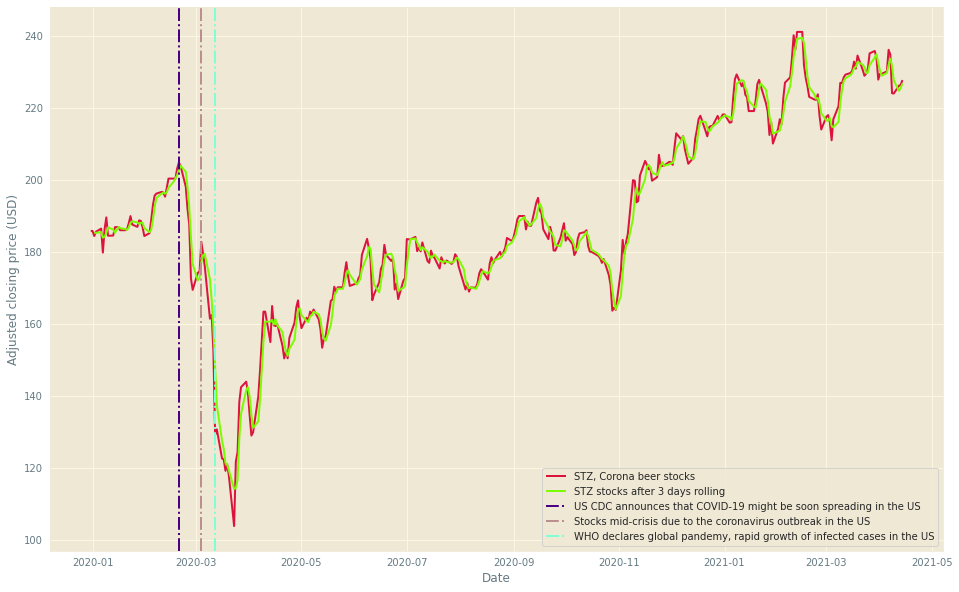

In [ ]:
corona = adj_close_prices.loc[:, 'STZ']
corona_rolling = corona.rolling(window=3, win_type='boxcar').mean() #definiujemy nowy DF,
#który na podstawie danych ACP dla daty od 31.12.2019 do 2.01.2020 włącznie, oblicza
#średnią wartość wskaźnika ACP w dniu 2.01.2020, okno "window" o długości 3 dni 
#przesuwa się dalej i tak oblicza średnie wartości wskaźnika ACP w kolejnych dniach 
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(corona.index, corona, label='STZ, Corona beer stocks', color="crimson")
#narysowanie wykresu dla uśrednionych wskaźników ACP dla piwa Corona
ax.plot(corona_rolling.index, corona_rolling, label='STZ stocks after 3 days rolling', color='lawngreen')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price (USD)')
#utworzenie 3 kluczowych pionowych indeksów z datami wydarzeń w USA i na świecie
plt.axvline(x='2020-02-20', label="US CDC announces that COVID-19 might be soon spreading in the US ", color='indigo', linestyle="dashdot")
plt.axvline(x='2020-03-04', label="Stocks mid-crisis due to the coronavirus outbreak in the US", color='rosybrown', linestyle="dashdot")
plt.axvline(x='2020-03-12', label="WHO declares global pandemy, rapid growth of infected cases in the US", color='aquamarine', linestyle="dashdot")
ax.legend()

b) Analiza trzech szeregów czasowych z użyciem .resample() oraz modułu .median() z biblioteki pandas.

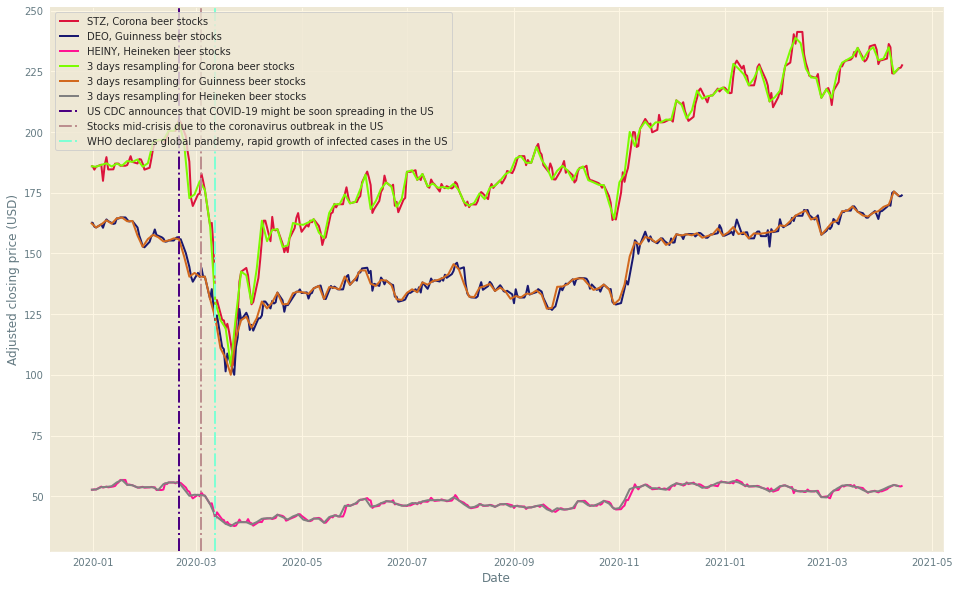

In [ ]:
corona = adj_close_prices.loc[:, 'STZ']
guinness = adj_close_prices.loc[:, 'DEO']
heineken = adj_close_prices.loc[:, 'HEINY']
corona_resample = corona.resample("3d").median()
guinness_resample = guinness.resample("3d").median()
heineken_resample = heineken.resample("3d").median()
#powyżej użyliśmy metody .resample() dla wskaźników ACP dla piwa Corona, 
#Guinness i Heineken. Spróbkowane wskaźniki ACP wygładzamy modułem .median() dla trzech
#kolejnych dni począwszy od 31.12.2019 itd. 
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(corona.index, corona, label='STZ, Corona beer stocks', color="crimson")
ax.plot(guinness.index, guinness, label='DEO, Guinness beer stocks', color="midnightblue")
ax.plot(heineken.index, heineken, label='HEINY, Heineken beer stocks', color="deeppink")
ax.plot(corona_resample.index, corona_resample, label='3 days resampling for Corona beer stocks', color='lawngreen')
ax.plot(guinness_resample.index, guinness_resample, label='3 days resampling for Guinness beer stocks', color='chocolate')
ax.plot(heineken_resample.index, heineken_resample, label='3 days resampling for Heineken beer stocks', color='grey')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price (USD)')
plt.axvline(x='2020-02-20', label="US CDC announces that COVID-19 might be soon spreading in the US ", color='indigo', linestyle="dashdot")
plt.axvline(x='2020-03-04', label="Stocks mid-crisis due to the coronavirus outbreak in the US", color='rosybrown', linestyle="dashdot")
plt.axvline(x='2020-03-12', label="WHO declares global pandemy, rapid growth of infected cases in the US", color='aquamarine', linestyle="dashdot")
ax.legend()

c) Przedstawienie trzech szeregów czasowych na wykresie .heatmap z biblioteki seaborn.

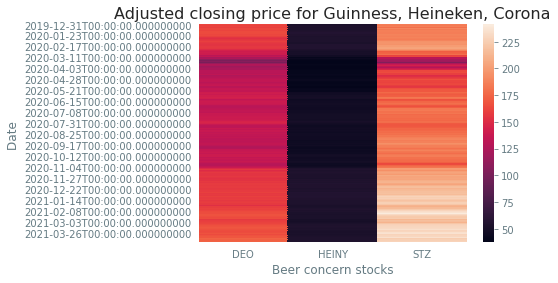

<Figure size 1440x1440 with 0 Axes>

In [ ]:
heat_map = sns.heatmap(adj_close_prices)
heat_map.set_title('Adjusted closing price for Guinness, Heineken, Corona')
plt.xlabel('Beer concern stocks')
plt.ylabel('Date ')
plt.figure(figsize=(20, 20))
plt.show()